#Full EDA Pipeline on titanic dataset

In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load Dataset
df= sns.load_dataset('titanic')
# creating a copy
df_copy=df.copy()

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
#duplicated row
print("Checking Duplicated rows")
print(df.duplicated().sum())

Checking Duplicated rows
107


(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

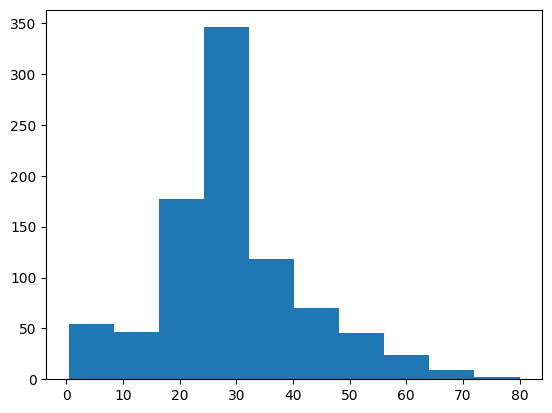

In [ ]:
plt.hist(df_copy["age"])

In [ ]:
df["age"].median()


28.0

In [ ]:
df["age"].mean()

np.float64(29.69911764705882)

In [ ]:

df["age"].mode()[0]

np.float64(24.0)

In [ ]:
#data cleaning
df_copy["age"].fillna(df_copy["age"].median(),inplace = True)

<ipython-input-88-223f8b503b74>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["age"].fillna(df_copy["age"].median(),inplace = True)


In [ ]:
df_copy

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df_copy.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
#Dropping columned named Deck dueto the missing value in maximum number of rows
df_copy.drop(columns='deck',inplace=True)

In [ ]:
df_copy.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
class,0
who,0
adult_male,0


In [ ]:
df_copy['embarked'].fillna(df_copy['embarked'].mode()[0],inplace=True)

<ipython-input-32-37e9e0323c06>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['embarked'].fillna(df_copy['embarked'].mode()[0],inplace=True)


In [ ]:
df_copy.duplicated().sum()

np.int64(116)

In [ ]:
df_copy.drop_duplicates(inplace=True)

In [ ]:
df_copy.duplicated().sum()

np.int64(0)

In [ ]:
df_copy.drop(columns='embarked',inplace=True)

In [ ]:
df_copy

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,age_scaled
0,0,3,0,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,19.744834
1,1,1,1,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,35.744834
2,1,3,1,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,23.744834
3,1,1,1,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,32.744834
4,0,3,0,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,32.744834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,Second,man,True,Southampton,no,True,24.744834
887,1,1,1,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True,16.744834
888,0,3,1,28.0,1,2,23.4500,Third,woman,False,Southampton,no,False,25.744834
889,1,1,0,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True,23.744834


In [ ]:
df_copy.isnull().sum()


,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
class,0
who,0
adult_male,0


In [ ]:
df_copy['embark_town'].fillna(df_copy['embark_town'].mode()[0],inplace=True)

<ipython-input-97-771ff154c2e0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['embark_town'].fillna(df_copy['embark_town'].mode()[0],inplace=True)


In [ ]:
df_copy.isnull().sum()


,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
#Encoding Categorical column
df_copy["sex"]= df_copy["sex"].map({"male":0,"female":1})

In [ ]:
#Feature Engineering
#scale numerical feature(basic standardization)
df_copy["age_scaled"]= (df_copy)["age"]-df_copy["age"].mean()/df_copy["age"].std()

In [ ]:
df_copy

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_scaled
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,19.744834
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,35.744834
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,23.744834
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,32.744834
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,32.744834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,24.744834
887,1,1,1,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,16.744834
888,0,3,1,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,25.744834
889,1,1,0,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,23.744834


In [ ]:
df_copy

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_scaled
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,19.744834
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,35.744834
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,23.744834
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,32.744834
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,32.744834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,24.744834
887,1,1,1,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,16.744834
888,0,3,1,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,25.744834
889,1,1,0,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,23.744834


In [ ]:
df_copy

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,age_scaled
0,0,3,0,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,19.744834
1,1,1,1,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,35.744834
2,1,3,1,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,23.744834
3,1,1,1,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,32.744834
4,0,3,0,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,32.744834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,Second,man,True,Southampton,no,True,24.744834
887,1,1,1,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True,16.744834
888,0,3,1,28.0,1,2,23.4500,Third,woman,False,Southampton,no,False,25.744834
889,1,1,0,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True,23.744834
